In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf 

In [2]:
#pip install tensorflow 

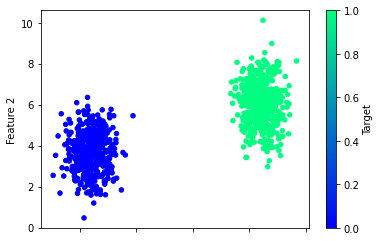

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter") 

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78) 

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test) 

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2)) 

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid")) 

In [9]:
# Check the structure of the Sequential model
nn_model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100) 

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.5540
Epoch 2/100
24/24 [==============================] - 0s 971us/step - loss: 0.6558 - accuracy: 0.7502
Epoch 3/100
24/24 [==============================] - 0s 724us/step - loss: 0.6461 - accuracy: 0.8054
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6418 - accuracy: 0.7863
Epoch 5/100
24/24 [==============================] - 0s 831us/step - loss: 0.6357 - accuracy: 0.8171
Epoch 6/100
24/24 [==============================] - 0s 898us/step - loss: 0.6253 - accuracy: 0.8306
Epoch 7/100
24/24 [==============================] - 0s 792us/step - loss: 0.6125 - accuracy: 0.8740
Epoch 8/100
24/24 [==============================] - 0s 947us/step - loss: 0.6015 - accuracy: 0.8940
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.9092
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5758 - accuracy: 0.93

24/24 [==============================] - 0s 635us/step - loss: 0.0947 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 630us/step - loss: 0.0909 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 630us/step - loss: 0.0895 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 612us/step - loss: 0.0891 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 598us/step - loss: 0.0896 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 595us/step - loss: 0.0873 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 601us/step - loss: 0.0841 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 591us/step - loss: 0.0846 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 609us/step - loss: 0.0854 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 606us/step - loss: 0.0814 - accuracy: 

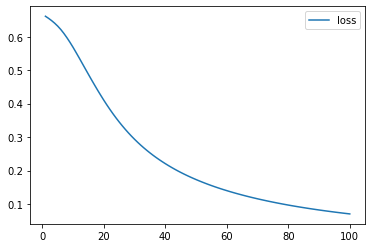

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss") 

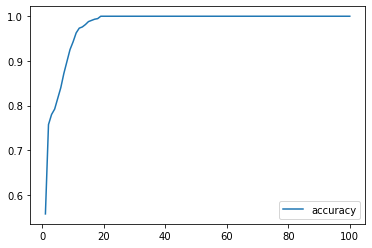

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy") 

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}") 

8/8 - 0s - loss: 0.0662 - accuracy: 1.0000
Loss: 0.06616414338350296, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32") 

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

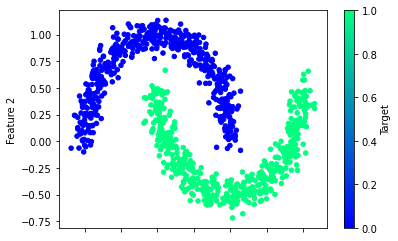

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test) 

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True) 

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7307 - accuracy: 0.6587
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6605 - accuracy: 0.6733
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.6893
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5729 - accuracy: 0.6960
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.7067
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.7173
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5071 - accuracy: 0.7227
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4917 - accuracy: 0.7293
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.7427
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4676 - accuracy: 0.7480
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2645 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2641 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2637 - accuracy: 0.8933
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8933
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8933
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.8933
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.8933
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.8933
Epoch 92/100


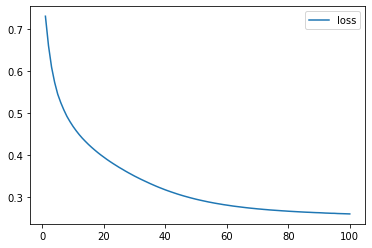

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss") 

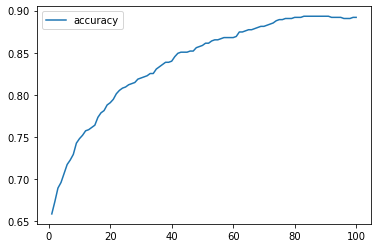

In [20]:
# Plot the loss
history_df.plot(y="accuracy") 

In [21]:
################
################
# Generate our new Sequential model
new_model = tf.keras.models.Sequential() 

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True) 

Epoch 1/100
24/24 [==============================] - 0s 768us/step - loss: 0.8489 - accuracy: 0.2845
Epoch 2/100
24/24 [==============================] - 0s 788us/step - loss: 0.8047 - accuracy: 0.3279
Epoch 3/100
24/24 [==============================] - 0s 802us/step - loss: 0.7566 - accuracy: 0.4460
Epoch 4/100
24/24 [==============================] - 0s 924us/step - loss: 0.7294 - accuracy: 0.4993
Epoch 5/100
24/24 [==============================] - 0s 995us/step - loss: 0.6970 - accuracy: 0.5563
Epoch 6/100
24/24 [==============================] - 0s 908us/step - loss: 0.6631 - accuracy: 0.6330
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.6605
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6051 - accuracy: 0.7409
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7865
Epoch 10/100
24/24 [==============================] - 0s 990us/step - loss: 0.5462 - accuracy: 0.

24/24 [==============================] - 0s 650us/step - loss: 0.2538 - accuracy: 0.8980
Epoch 82/100
24/24 [==============================] - 0s 643us/step - loss: 0.2317 - accuracy: 0.9119
Epoch 83/100
24/24 [==============================] - 0s 667us/step - loss: 0.2238 - accuracy: 0.9134
Epoch 84/100
24/24 [==============================] - 0s 653us/step - loss: 0.2390 - accuracy: 0.9033
Epoch 85/100
24/24 [==============================] - 0s 655us/step - loss: 0.2268 - accuracy: 0.9131
Epoch 86/100
24/24 [==============================] - 0s 650us/step - loss: 0.2612 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 642us/step - loss: 0.2520 - accuracy: 0.8935
Epoch 88/100
24/24 [==============================] - 0s 666us/step - loss: 0.2401 - accuracy: 0.9002
Epoch 89/100
24/24 [==============================] - 0s 639us/step - loss: 0.2553 - accuracy: 0.8923
Epoch 90/100
24/24 [==============================] - 0s 668us/step - loss: 0.2435 - accuracy: 